# Workbook for (hopefully) simulating holograms
(Created by George Lewis, based on code written by James Loudon and Sam Holt)

## Package import

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
from scipy import constants

## Magnetisation input
- First stage is to import or generate data. 
- Data should be an array where each row contains [$x, y, z, m_x, m_y, m_z$]. 
- This should then be organised so that 'coor' is an $n\times3$ array of [$x,y,z$] positions, with 'm_x', 'm_y' and 'm_z' each being an array of magnetisation data. 
- The extent of this data should cover the full region of interest (sample + space).

### Load from file

In [ ]:
folder = r'C:\Users\grl31\Documents\MERRILL\merrill-1.3.3-Windows-x86_64\size_loop_0mt'
fname = 'hyst_001_300.dat'
fpath = folder + '\\' + fname

# 'fixed width formatted' works directly with even .dat format
data = pandas.read_fwf(fpath, header = None)

all_x = np.take(data,0,axis=1)
all_y = np.take(data,1,axis=1)
all_z = np.take(data,2,axis=1)

coor = np.array([all_x,all_y,all_z]).T
m_x = np.take(data,3,axis=1)
m_y = np.take(data,4,axis=1)
m_z = np.take(data,5,axis=1)

### Generate 'bar magnet' dataset

In [168]:
# Generate x,y value
n = 100
xs = np.linspace(0,100,n)
ys = np.linspace(100,200,n)
zs = np.linspace(200,300,n)
xx, yy, zz = np.meshgrid(xs,ys, zs)
nx = xx.reshape(n**3)
ny = yy.reshape(n**3)
nz = zz.reshape(n**3)
coor = np.array([nx,ny,nz]).T

# Generate magnetisation
Mx = np.zeros_like(xs)
My = np.zeros_like(ys)
Mz = np.zeros_like(zs)
Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz)
Mxx[round(n/4):round(3*n/4),round(n/4):round(3*n/4),:] = 1

m_x, m_y, m_z = Mxx, Myy, Mzz

ave_m_x = Mxx.mean(axis=2)
ave_m_y = Myy.mean(axis=2)
ave_m_z = Mzz.mean(axis=2)

### Generate 'ring' dataset

In [3]:
# Generate x,y value
n = 100
xs = np.linspace(-50,50,n)
ys = np.linspace(-50,50,n)
zs = np.linspace(-50,50,n)
xx, yy, zz = np.meshgrid(xs,ys, zs)
nx = xx.reshape(n**3)
ny = yy.reshape(n**3)
nz = zz.reshape(n**3)
coor = np.array([nx,ny,nz]).T

# Generate magnetisation
#Mx = np.zeros_like(xs)
#My = np.zeros_like(ys)
#Mz = np.zeros_like(zs)
#Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz)

data = []
for x in xs:
    for y in ys:
        for z in zs:
            if x**2 + y**2 < 25**2 and x**2 + y**2 > 10**2:
                m = [1,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])
            else:
                m = [0,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])

Mxx = np.take(data,3,axis=1)
Myy = np.take(data,4,axis=1)
Mzz = np.take(data,5,axis=1)

Mxx = Mxx.reshape(len(xs),len(ys),len(zs))
Myy = Myy.reshape(len(xs),len(ys),len(zs))
Mzz = Mzz.reshape(len(xs),len(ys),len(zs))

m_x, m_y, m_z = Mxx, Myy, Mzz

ave_m_x = Mxx.mean(axis=2)
ave_m_y = Myy.mean(axis=2)
ave_m_z = Mzz.mean(axis=2)

### Confirm and homogonise data 

In [4]:
# Array with unique z coordinates
xuni = np.unique(coor[:,0])
yuni = np.unique(coor[:,1])
zuni = np.unique(coor[:,2])

# Length of each dimension
x_len = len(xuni)
y_len = len(yuni)
z_len = len(zuni)

# Generate mesh
X, Y, Z = np.meshgrid(xuni, yuni, zuni)

# Calculate grid spacing
x_res = (xuni[1]-xuni[0])
y_res = (yuni[1]-yuni[0])
z_res = (yuni[1]-yuni[0])

# Limits of grid
x_begin = xuni[0] - 0.5*x_res
x_end = xuni[-1] + 0.5*x_res
y_begin = yuni[0] - 0.5*y_res
y_end = yuni[-1] + 0.5*y_res
z_begin = zuni[0] - 0.5*z_res
z_end = zuni[-1] + 0.5*z_res

# Calculate size of grid
x_size = (x_end-x_begin)
y_size = (y_end-y_begin)
z_size = (z_end-z_begin)

# Confirm the dimensions of the image and resolution for the user.
sym_details = 'The data imported has dimensions ' + str(x_size) + ' x ' + str(y_size) + ' x ' + str(z_size) + ' nm,\n'
sym_details += 'and resolution ' + str(x_res) + ' x ' + str(y_res) + ' x ' + str(z_res) + ' nm.\n'
sym_details += 'There are a total of ' + str(z_len) + ' slices in z.'
print(sym_details)

The data imported has dimensions 101.01010101 x 101.01010101 x 101.01010101 nm,
and resolution 1.0101010101 x 1.0101010101 x 1.0101010101 nm.
There are a total of 100 slices in z.


### Plot input magnetisation

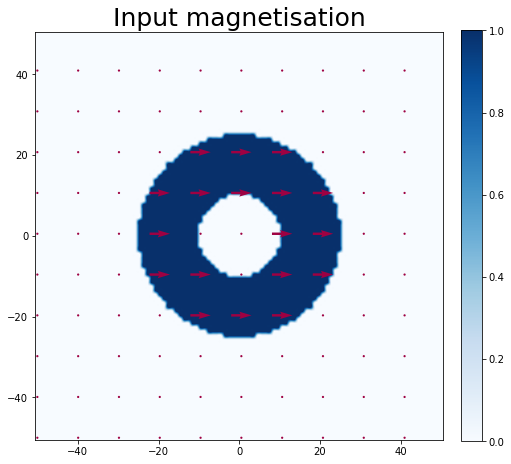

In [7]:
skip_arrow = 10#1
size_arrow = 0.05#0.04


f, ax = plt.subplots(figsize=(8, 8))
plt.title('Input magnetisation', fontsize=25)
Q = plt.quiver(X[::skip_arrow, ::skip_arrow, 0], 
               Y[::skip_arrow, ::skip_arrow, 0], 
               ave_m_x[::skip_arrow, ::skip_arrow], 
               ave_m_y[::skip_arrow, ::skip_arrow],
               np.arctan2(ave_m_x, ave_m_y),
               scale=1/size_arrow, cmap='Spectral', pivot='mid')


pos = ax.imshow(np.hypot(ave_m_x, ave_m_y),origin='lower', extent=[x_begin, x_end, y_begin, y_end],interpolation='spline16',cmap='Blues')
f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)

## Calculate magnetic phase and B-field
### Set parameters

In [8]:
ds = 0.1 # Defocus step in mm
kx = 0.1 # Tikhonov filter radius in x in pixels
ky = 0.1 # Tikhonov filter radius in y in pixels
kv = 300 # Acceleratig voltage of electrons in kV
Cs = 8000 # Spherical aberration coefficient in mm

In [9]:
# Function for working out the relativistic wavelength of an electron 
# Input in kV
# output in nm
def λ_func(V):
    V *= constants.kilo
    λ = constants.h/(constants.nano*np.sqrt(2*V*constants.m_e*constants.e))
    λ *= 1/(np.sqrt(1+(constants.e*V)/(2*constants.m_e*constants.c**2)))
    return λ

In [10]:
sx = 1/(x_size*x_res) # sampling in reciprocal space 
sy = 1/(y_size*y_res) # identical in both directions
const = 1j*z_size/(2*constants.codata.value('mag. flux quantum')/(constants.nano**2))
λ = λ_func(kv) # Wavelength of electrons in nm
print('The electron beam has a wavelength of %.2E nm.' % λ)

The electron beam has a wavelength of 1.97E-03 nm.


### Calculate phase

In [11]:
# Fourier transform magnetisation
ft_mx = np.fft.fft2(ave_m_x, axes=(-2, -1))
ft_my = np.fft.fft2(ave_m_y, axes=(-2, -1))

FreqCompRows = np.fft.fftfreq(ft_mx.shape[0],d=x_res)
FreqCompCols = np.fft.fftfreq(ft_mx.shape[1],d=y_res)
Xft, Yft = np.meshgrid(FreqCompCols,FreqCompRows) # Create a grid of coordinates


nume =  ((Xft**2)+(Yft**2))
dnom =  ((Xft**2)+(Yft**2)+(sx**2)*(kx**2)+(sy**2)*(ky**2))**2
cross = -ft_my*Xft+ft_mx*Yft
ft_phase = np.array(const*cross*nume/dnom)
phase = np.fft.ifft2(ft_phase).real

### Plot phase

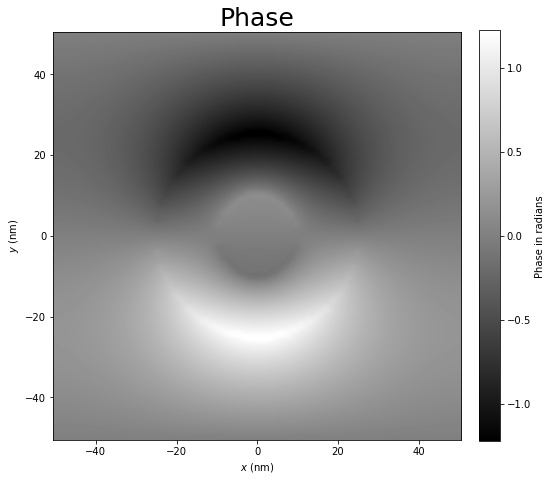

In [12]:
plt.figure(figsize=(8, 8))
plt.title('Phase', fontsize=25)
imgplot1 = plt.imshow(phase,origin='lower', extent=[x_begin, x_end, y_begin, y_end], cmap='gray', interpolation='spline16')
cbar1 = plt.colorbar(imgplot1, fraction=0.046, pad=0.04)
plt.xlabel("$x$ (nm)")
plt.ylabel("$y$ (nm)")
cbar_lab = cbar1.ax.set_ylabel("Phase in radians")

### Plot cosine of phase

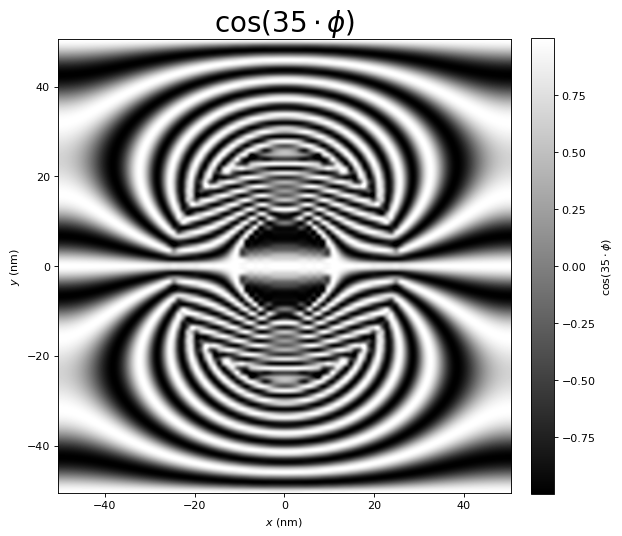

In [13]:
pa = 35 # phase amplification factor

#print('The electron beam has a wavlength of %.2E nm.' % λ)

cos_phase = np.cos(pa*phase)
plt.figure(figsize=(8, 8), dpi=80)
plt.title(r'$\cos \left( %g \cdot \phi \right)$' % pa, fontsize=25)
#plt.title(r'$\cos \left( 10 \phi \right)$', fontsize=25)
imgplot3 = plt.imshow(cos_phase, origin='lower', extent=[x_begin, x_end, y_begin, y_end],cmap='gray', interpolation='spline16')
cbar1 = plt.colorbar(imgplot3, fraction=0.046, pad=0.04)
plt.xlabel("$x$ (nm)")
plt.ylabel("$y$ (nm)")
cbar_lab = cbar1.ax.set_ylabel(r'$\cos \left( %g \cdot \phi  \right)$' % pa)

### Calculate projected B field

In [14]:
d_phase = np.gradient(phase)
b_const = (constants.codata.value('mag. flux quantum')/(constants.nano**2))/(np.pi*z_size)
b_field_x = -b_const*d_phase[0]/y_res
b_field_y = b_const*d_phase[1]/x_res

mag_B = (1 - np.sqrt(b_field_x**2 + b_field_y**2)/np.max(np.sqrt(b_field_x**2 + b_field_y**2)))

### Plot projected B field

Text(0.5, 1.0, 'Projected B-field')

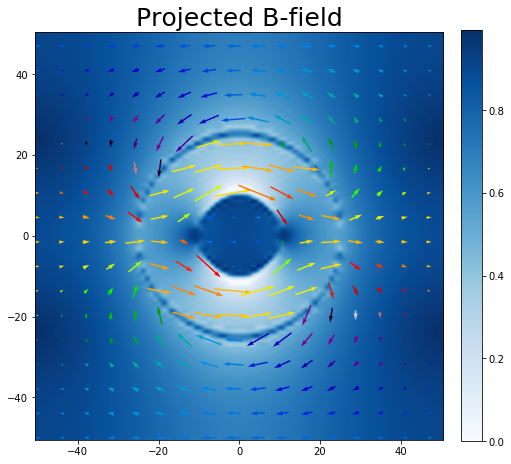

In [17]:
skip_arrow = 6
size_arrow = 0.14

f, ax = plt.subplots(ncols=1, figsize=(8, 8))

pos = ax.imshow(mag_B,origin='lower', extent=[x_begin, x_end, y_begin, y_end],interpolation='spline16', cmap='Blues')
f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)

plt.quiver(X[::skip_arrow, ::skip_arrow, 0],
           Y[::skip_arrow, ::skip_arrow, 0],
           b_field_x[::skip_arrow, ::skip_arrow], 
           b_field_y[::skip_arrow, ::skip_arrow], 
           np.arctan2(b_field_x[::skip_arrow, ::skip_arrow], 
                      b_field_y[::skip_arrow, ::skip_arrow]),
          scale = 1/size_arrow, cmap='nipy_spectral', pivot='mid')

ax.set_title('Projected B-field', fontsize=25)


In [1]:
# My fourth change to test checkpoints are ignored